<a href="https://colab.research.google.com/github/pythience/Desafio3/blob/master/8_Desafio3_FeatureImportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 3: Atributos más importantes

## Aplicamos `DecissionTreeClasifier` y `GridSearchCV` para encontrar el mejor árbol de decisión y la importancia de las `features` sobre los datos de intenciones de compras en línea balanceados con `SMOTE`.

## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


### Construyendo un árbol de clasificación con scikit-learn
Construiremos un árbol de clasificación usando el dataset.

- Dividir X e y con train_test_split así:
        train_test_split(X, y, test_size=0.3, random_state=42)
- Ajustar un árbol de clasificación con `max_depth=3`
- Visualizar el árbol usando graphviz
- Calcular la importancia de los atributos
- Calcular y mostrar la matriz de confusión
- Sacar la restricción de `max_depth=3` y ver si la clasificación mejora

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
path='gdrive/My Drive/DataScience - DH/Desafio3/'



---



---



In [0]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import savefig

Populating the interactive namespace from numpy and matplotlib


In [0]:
dict_df = pd.read_pickle('{}online_shoppers_intention_dummies_X-y_SMOTE.pkl'.format(path))

In [0]:
# Leer los datos con Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
data = load_boston()

X = pd.DataFrame(dict_df['X_bal_train'])
y = pd.DataFrame(dict_df['y_bal_train'])

In [0]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,14.0,825.333333,0.000000,0.000000,50.411160,0.0,8.0,2.0,2.0,8.0,4.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,7.0,203.666667,0.000000,0.009524,0.000000,0.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0
2,8.0,403.0,0.0,0.0,52.0,1616.548160,0.000000,0.003686,0.000000,0.0,11.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0
3,1.0,22.2,0.0,0.0,34.0,606.200000,0.000000,0.001389,17.929834,0.0,10.0,2.0,2.0,7.0,3.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,8.0,143.583333,0.014286,0.050000,0.000000,0.0,11.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0


In [0]:
feature_names = ('Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'New_Visitor', 'Returning_Visitor', 'Weekend_True')
type(feature_names)

tuple

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [0]:

# Dividir X e y con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# Ajustar un árbol de clasificación con max_depth=3
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

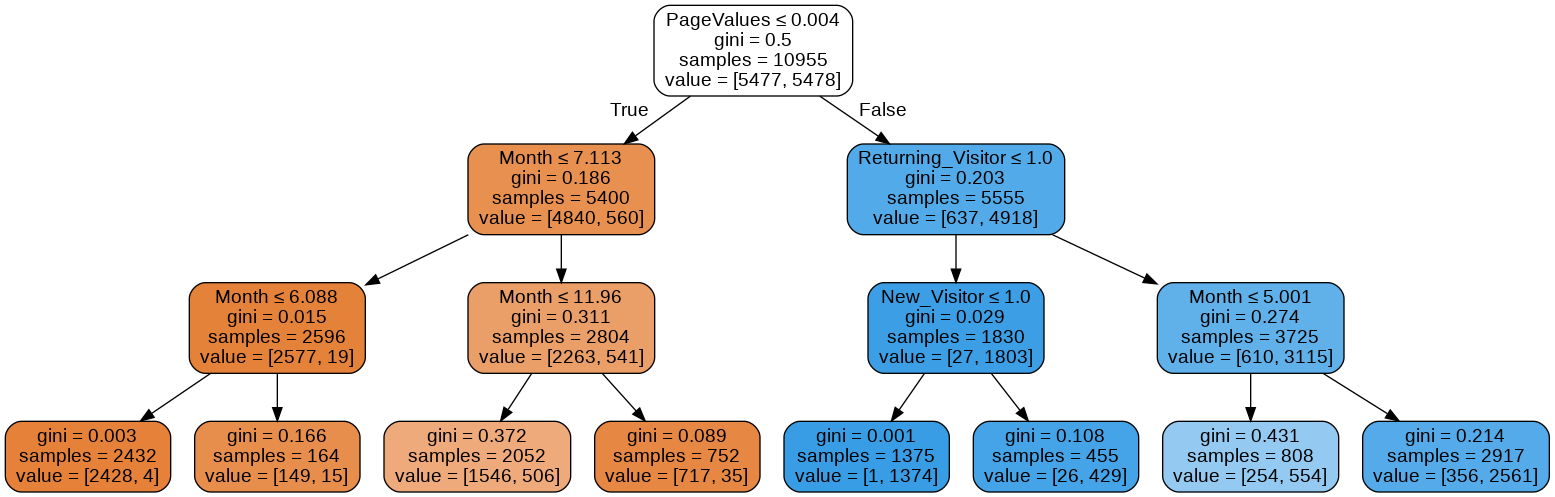

In [0]:
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
# Calcular la importancia de los atributos
pd.DataFrame({'Atributo':feature_names,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head()

,Atributo,importancia
8,PageValues,0.932318
10,Month,0.051891
16,Returning_Visitor,0.015184
15,New_Visitor,0.000606
0,Administrative,0.000000


In [0]:
def graficar_confusion_matrix(y_test,y_pred,filename):
  # Elaboramos la matriz de confusión:
  from sklearn.metrics import  accuracy_score

  sns.set(rc={'figure.figsize':(5,4)})
  sns_cfmx = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=.5, cmap="OrRd", cbar=False)

  #print(accuracy_score(y_test, y_pred_test))
  plt.ylabel('Verdaderos')
  plt.xlabel('Predichos');

  sns_cfmx.plot()
  fig = sns_cfmx.get_figure()
  fig.savefig(filename, dpi=400)

In [0]:
y_pred =  treeclf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2348
           1       0.90      0.91      0.91      2347

    accuracy                           0.91      4695
   macro avg       0.91      0.91      0.91      4695
weighted avg       0.91      0.91      0.91      4695



In [0]:
# Calcular y mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
predicted_cols = ['Pred Not Revenue', 'Pred Revenue']
pd.DataFrame(conf, columns = predicted_cols)

,Pred Not Revenue,Pred Revenue
0,2120,228
1,216,2131


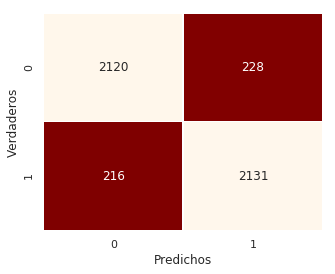

In [0]:
graficar_confusion_matrix(y_test,y_pred,"{}DecisionTreeClassifier_confMatrix_heatmap.png".format(path))

In [0]:
# Sacar la restricción de max_depth=3 y ver si la clasificación mejora
treeclf = DecisionTreeClassifier(random_state=1)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['Pred Not Revenue', 'Pred Revenue']
pd.DataFrame(conf, columns = predicted_cols)

,Pred Not Revenue,Pred Revenue
0,2120,228
1,216,2131


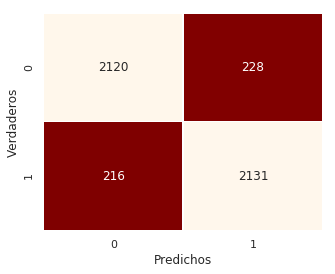

In [0]:
graficar_confusion_matrix(y_test,y_pred,"{}DecisionTreeClassifier_confMatrix_heatmap.png".format(path))

In [0]:
print('Accuracy score = {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score = 0.9054313099041533


In [0]:
from sklearn.metrics import recall_score

# sensitivity = TP / float(FN + TP)
print('Recall score = {}'.format(recall_score(y_test, y_pred)))

Recall score = 0.907967618236046


In [0]:
from sklearn.metrics import precision_score

# precision = TP / float(TP + FP)
print('Precision score = {}'.format(precision_score(y_test, y_pred)))

Precision score = 0.9033488766426452


Mejor modelo encontrado (área = 0.91)


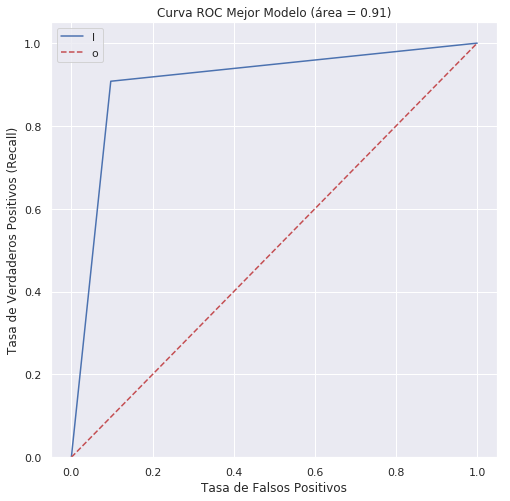

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, treeclf.predict_proba(X_test)[:,1])


print('Mejor modelo encontrado (área = %0.2f)' % logit_roc_auc)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Mejor modelo encontrado (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC'+' Mejor Modelo (área = %0.2f)' % logit_roc_auc)
plt.legend("lower right")
plt.savefig("{}BestModel_ROC.png".format(path), dpi=400)
plt.show()

## Extra

Visualizar el último árbol. 

In [0]:
dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [0]:
graph.write_png('{}features_importance_treeview.png'.format(path))